In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import json
import folium
from geoband.API import *
from shapely.geometry import Point, Polygon
from datetime import datetime
import pydeck as pdk

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
GetCompasData('SBJ_2109_001', '1', '1.수원시_112신고이력(격자_관할경계매핑).csv')
GetCompasData('SBJ_2109_001', '3', '3.3개시도_112신고이력(관할경계매핑).csv')
GetCompasData('SBJ_2109_001', '4', '4.수원시_시간대별_유동인구(2020).csv')
GetCompasData('SBJ_2109_001', '7', '7.4개시도_주택노후도.geojson')
GetCompasData('SBJ_2109_001', '8', '8.4개시도_유흥업소현황.geojson')
GetCompasData('SBJ_2109_001', '11', '11.4개시도_경찰서_관할경계.geojson')
GetCompasData('SBJ_2109_001', '12', '12.4개시도_치안안전센터_관할경계.geojson')
GetCompasData('SBJ_2109_001', '22', '22.4개시도_보안등현황.csv')
GetCompasData('SBJ_2109_001', '23', '23.4개시도_안전비상벨현황.geojson')
GetCompasData('SBJ_2109_001', '24', '24.4개시도_CCTV설치현황.csv')
GetCompasData('SBJ_2109_001', '32', '32.수원시_표준격자(250M_x_250M).geojson')
GetCompasData('SBJ_2109_001', '42', '42.4개시도_편의점현황.geojson')

In [3]:
layer = gpd.read_file('11.4개시도_경찰서_관할경계.geojson')
layer.rename(columns = {'NAME':'region'}, inplace = True)

In [4]:
layer.head()

region PNAME                                           geometry
0    진주경찰서   경남청  MULTIPOLYGON (((128.26697 35.12927, 128.26697 ...
1  창원서부경찰서   경남청  MULTIPOLYGON (((128.63363 35.22152, 128.63357 ...
2  창원중부경찰서   경남청  MULTIPOLYGON (((128.60966 35.15093, 128.60956 ...
3  마산동부경찰서   경남청  MULTIPOLYGON (((128.62696 35.21714, 128.62695 ...
4  마산중부경찰서   경남청  MULTIPOLYGON (((128.43007 35.05918, 128.43005 ...

In [5]:
seoul_suwon = ['서울강동경찰서', '서울송파경찰서', '서울수서경찰서', '서울방배경찰서', '서울남대문경찰서', '서울서부경찰서',
       '서울양천경찰서', '서울강서경찰서', '서울성북경찰서', '서울용산경찰서', '서울광진경찰서', '서울종암경찰서',
       '수원남부경찰서', '서울동대문경찰서', '서울성동경찰서', '서울중부경찰서', '서울혜화경찰서', '서울중랑경찰서',
       '서울강남경찰서', '서울서초경찰서', '서울서대문경찰서', '서울종로경찰서', '서울마포경찰서', '수원서부경찰서',
       '수원중부경찰서', '서울관악경찰서', '서울동작경찰서', '서울금천경찰서', '서울구로경찰서', '서울영등포경찰서',
       '서울도봉경찰서', '서울은평경찰서', '서울강북경찰서', '서울노원경찰서']

유동인구(수원, 서울)

In [6]:
pop_suwon = pd.read_csv('4.수원시_시간대별_유동인구(2020).csv')

In [7]:
pop_suwon['lat'] = pop_suwon['lat'].astype('float')
pop_suwon['lon'] = pop_suwon['lon'].astype('float')

In [8]:
pop_suwon_gdf = gpd.GeoDataFrame(pop_suwon, geometry = gpd.points_from_xy(pop_suwon['lon'], pop_suwon['lat']))
pop_suwon_gdf.set_crs(epsg = 4326, inplace = True)

STD_YM  TMST_00  TMST_01  TMST_02  TMST_03  TMST_04  TMST_05  TMST_06  \
0       202001     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
1       202001     0.04     0.02     0.02     0.02     0.02     0.02     0.02   
2       202001     0.05     0.05     0.04     0.02     0.02     0.04     0.04   
3       202001     0.02     0.02     0.02     0.00     0.00     0.00     0.02   
4       202001     0.02     0.02     0.00     0.00     0.00     0.02     0.02   
...        ...      ...      ...      ...      ...      ...      ...      ...   
416075  202012     0.02     0.02     0.00     0.00     0.00     0.02     0.04   
416076  202012     0.07     0.05     0.04     0.04     0.04     0.07     0.19   
416077  202012     0.35     0.26     0.21     0.19     0.19     0.35     0.79   
416078  202012     0.16     0.12     0.09     0.07     0.09     0.14     0.28   
416079  202012     0.02     0.00     0.00     0.00     0.00     0.02     0.04   

        TMST_07  TMST_08  ...  TMST_17  TMST_18  TMST_19  TMST_20  TMST_21  \
0          0.00     0.02  ...     0.02     0.02     0.02     0.02     0.02   
1          0.02     0.04  ...     0.05     0.07     0.07     0.05     0.05   
2          0.04     0.05  ...     0.11     0.12     0.12     0.11     0.12   
3          0.02     0.02  ...     0.04     0.04     0.04     0.04     0.04   
4          0.02     0.07  ...     0.07     0.09     0.09     0.07     0.05   
...         ...      ...  ...      ...      ...      ...      ...      ...   
416075     0.05     0.07  ...     0.11     0.11     0.07     0.05     0.05   
416076     0.37     0.48  ...     0.60     0.58     0.41     0.30     0.26   
416077     1.39     1.77  ...     2.24     2.24     1.62     1.31     1.13   
416078     0.53     0.76  ...     1.02     1.06     0.79     0.67     0.57   
416079     0.05     0.07  ...     0.09     0.11     0.07     0.05     0.04   

        TMST_22  TMST_23         lon        lat                    geometry  
0          0.02     0.02  126.929668  37.270151  POINT (126.92967 37.27015)  
1          0.05     0.04  126.930229  37.270604  POINT (126.93023 37.27060)  
2          0.11     0.09  126.930188  37.276012  POINT (126.93019 37.27601)  
3          0.04     0.02  126.931363  37.269708  POINT (126.93136 37.26971)  
4          0.05     0.04  126.931319  37.275567  POINT (126.93132 37.27557)  
...         ...      ...         ...        ...                         ...  
416075     0.02     0.02  127.089136  37.293797  POINT (127.08914 37.29380)  
416076     0.16     0.09  127.089134  37.294248  POINT (127.08913 37.29425)  
416077     0.74     0.51  127.089129  37.295149  POINT (127.08913 37.29515)  
416078     0.37     0.26  127.089126  37.295600  POINT (127.08913 37.29560)  
416079     0.02     0.02  127.089116  37.297403  POINT (127.08912 37.29740)  

[416080 rows x 28 columns]

In [9]:
pop_suwon_gdf_temp = pop_suwon_gdf.drop(['STD_YM', 'lon', 'lat', 'geometry'], axis = 1)
pop_suwon_gdf_temp['pop_tot'] = pop_suwon_gdf_temp.mean(axis = 1)
pop_suwon_gdf_temp['geometry'] = pop_suwon_gdf['geometry']
pop_suwon_gdf = pop_suwon_gdf_temp[['pop_tot', 'geometry']]

In [10]:
pop_suwon_mapping = gpd.sjoin(pop_suwon_gdf, layer, how = 'left', op = 'within')

In [11]:
pop_suwon_gb = pd.DataFrame(pop_suwon_mapping['pop_tot'].groupby(pop_suwon_mapping['region']).sum())
pop_suwon_gb['pop_tot'] = pop_suwon_gb['pop_tot']/12

서울 유동인구 부분

In [12]:
pop_seoul = pd.read_csv('서울_생활인구_시군구.csv')
pop_seoul['총_계'] = pop_seoul['총_계'].astype(int)
pop_seoul = pop_seoul[['자치구', '총_계']]
sgg = gpd.read_file('시군구_관할경계.json')

In [13]:
sgg = sgg[sgg['SIG_CD'].str[:2] == '11']
pop_seoul_merge = pd.merge(pop_seoul, sgg, how = 'left', left_on = '자치구', right_on = 'SIG_KOR_NM')
pop_seoul = pop_seoul_merge.drop(['SIG_CD', 'SIG_ENG_NM', 'SIG_KOR_NM'], axis = 1)
type(pop_seoul)

pandas.core.frame.DataFrame

In [14]:
pop_seoul_gdf = gpd.GeoDataFrame(pop_seoul, geometry = pop_seoul['geometry'])
print(pop_seoul_gdf.crs)

None


In [15]:
pop_seoul_gdf.set_crs(epsg = 5179, inplace = True)

자치구     총_계                                           geometry
0    종로구  155106  POLYGON ((956893.785 1953687.981, 956892.799 1...
1     중구  132259  POLYGON ((957910.537 1952611.485, 957909.908 1...
2    용산구  240665  POLYGON ((956624.814 1949536.043, 956570.524 1...
3    성동구  295767  POLYGON ((962233.152 1951264.677, 962222.317 1...
4    광진구  355306  POLYGON ((966017.815 1950892.985, 966015.465 1...
5   동대문구  352259  POLYGON ((962141.894 1956519.461, 962141.638 1...
6    중랑구  394679  POLYGON ((964757.107 1952784.740, 964762.547 1...
7    성북구  443206  POLYGON ((956478.623 1953969.861, 956485.227 1...
8    강북구  306093  POLYGON ((956316.789 1965175.345, 956313.249 1...
9    도봉구  322419  POLYGON ((956677.648 1965103.515, 956675.556 1...
10   노원구  520005  POLYGON ((965191.031 1957953.845, 965200.413 1...
11   은평구  479409  POLYGON ((951965.433 1961737.349, 951963.664 1...
12  서대문구  317699  POLYGON ((952902.640 1951962.194, 952901.927 1...
13   마포구  379984  POLYGON ((947203.268 1953126.517, 946803.981 1...
14   양천구  454288  POLYGON ((945302.971 1950041.503, 945290.230 1...
15   강서구  582995  POLYGON ((939853.290 1955141.642, 939825.594 1...
16   구로구  424582  POLYGON ((945165.288 1946679.147, 945172.757 1...
17   금천구  244685  POLYGON ((944705.924 1943086.537, 944693.873 1...
18  영등포구  402375  POLYGON ((945279.983 1950949.362, 945276.786 1...
19   동작구  397231  POLYGON ((951979.151 1946359.127, 951927.642 1...
20   관악구  502698  POLYGON ((949479.395 1944105.445, 949478.587 1...
21   서초구  422174  POLYGON ((959673.786 1942467.331, 959671.457 1...
22   강남구  536107  POLYGON ((960788.864 1947761.156, 960714.435 1...
23   송파구  664341  POLYGON ((968636.642 1946453.195, 968626.747 1...
24   강동구  469094  POLYGON ((971598.938 1952386.759, 971597.156 1...

In [16]:
layer_seoul = layer[layer['PNAME'].str[:] == '서울청']
layer_seoul.reset_index(inplace = True)
layer_seoul.drop(['index'], axis = 1, inplace = True)

/opt/app-root/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
layer_seoul.to_crs(epsg = 5179, inplace = True)
layer_seoul.geometry = layer_seoul.buffer(0)

/opt/app-root/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [18]:
pop_seoul_gdf['총_계'] = pop_seoul_gdf['총_계'].astype(int)

In [19]:
area_inter = []
for i in range(len(layer_seoul)):
    layer_area = 0
    for j in range(len(pop_seoul_gdf)):
        percentage = layer_seoul.geometry[i].intersection(pop_seoul_gdf.geometry[j]).area / pop_seoul_gdf.geometry[j].area
        layer_area += pop_seoul_gdf['총_계'][j] * percentage
    area_inter.append(layer_area)

In [20]:
df_temp = pd.DataFrame(area_inter)
layer_seoul['pop_tot'] = df_temp/3    # 분기별 유동인구 데이터 -> 월 평균으로 사용하기 위함

In [21]:
pop_seoul_gb = layer_seoul[['pop_tot', 'region']]
pop_seoul_gb = pop_seoul_gb.set_index('region')

In [22]:
pop = pd.concat([pop_seoul_gb, pop_suwon_gb])

cctv

In [23]:
cctv = pd.read_csv('24.4개시도_CCTV설치현황.csv')

In [24]:
cctv_gdf = gpd.GeoDataFrame(cctv, geometry = gpd.points_from_xy(cctv['lon'], cctv['lat']))
cctv_gdf.set_crs(epsg = 4326, inplace = True)

address purpose  cctv_cnt    set_yr        lat  \
0        경상남도 진주시 집현면 지내리 125   어린이보호         1  `2013-12  35.241319   
1        경상남도 진주시 집현면 지내리 125   어린이보호         4  `2013-12  35.242023   
2        경상남도 진주시 집현면 지내리 125   어린이보호         4  `2013-12  35.241209   
3      경상남도 진주시 진성면 상촌리 541-2   어린이보호         1  `2013-12  35.169310   
4      경상남도 진주시 진성면 상촌리 541-2   어린이보호         4  `2013-12  35.169223   
...                       ...     ...       ...       ...        ...   
44974     서울특별시 성북구 길음동 635-7   어린이보호         4  `2010-12  37.613782   
44975    서울특별시 성북구 길음동 1280-4   어린이보호         4  `2010-12  37.610174   
44976      서울특별시 성북구 길음동 1168   어린이보호         4  `2010-12  37.609928   
44977     서울특별시 성북구 하월곡동 87-6   어린이보호         4  `2010-12  37.609267   
44978   서울특별시 성북구 하월곡동 산2-140   어린이보호         4  `2010-12  37.608349   

              lon                    geometry  
0      128.093399  POINT (128.09340 35.24132)  
1      128.091990  POINT (128.09199 35.24202)  
2      128.092923  POINT (128.09292 35.24121)  
3      128.224780  POINT (128.22478 35.16931)  
4      128.225446  POINT (128.22545 35.16922)  
...           ...                         ...  
44974  127.018663  POINT (127.01866 37.61378)  
44975  127.015332  POINT (127.01533 37.61017)  
44976  127.022334  POINT (127.02233 37.60993)  
44977  127.032080  POINT (127.03208 37.60927)  
44978  127.039415  POINT (127.03941 37.60835)  

[44979 rows x 7 columns]

In [25]:
cctv_gdf_mapping = gpd.sjoin(cctv_gdf, layer, how = 'left', op = 'within')

In [26]:
cctv_gdf_mapping.drop(['address', 'purpose', 'set_yr', 'lat', 'lon', 'index_right', 'PNAME'], axis = 1, inplace = True)

In [27]:
cctv_gdf_mapping = cctv_gdf_mapping[cctv_gdf_mapping['region'].isin(seoul_suwon)]
cctv_gb = pd.DataFrame(cctv_gdf_mapping['cctv_cnt'].groupby(cctv_gdf_mapping['region']).sum())

In [28]:
result = pop.join(cctv_gb)

주택노후도

In [29]:
old_gdf = gpd.read_file('7.4개시도_주택노후도.geojson')

In [30]:
old_gdf['point'] = old_gdf.geometry.centroid
old_gdf.geometry = old_gdf['point']
old_gdf.rename(columns = {'geometry':'boundary', 'point':'geometry'}, inplace = True)

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [31]:
old_gdf_mapping = gpd.sjoin(old_gdf, layer, how = 'left', op = 'within')

In [32]:
old_gdf_mapping.drop(['ORG_GID', 'BLD_NM', 'DONG_NM', 'PNU', 'STRCT_NM', 'USE_NM',
       'USEAPR_DAY', 'OLD_LEVEL', 'boundary', 'index_right', 'PNAME'], axis = 1, inplace = True)

In [33]:
old_gdf_mapping_over20 = old_gdf_mapping[old_gdf_mapping['OLD_YEAR'] >= 20]

In [34]:
old_gdf_mapping_over20['nohu_cnt'] = 1
old_gdf_mapping_over20.drop(['OLD_YEAR'], axis = 1, inplace = True)

/opt/app-root/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/opt/app-root/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
old_gdf_mapping_over20 = old_gdf_mapping_over20[old_gdf_mapping_over20['region'].isin(seoul_suwon)]

In [36]:
old_over20_gb = pd.DataFrame(old_gdf_mapping_over20['nohu_cnt'].groupby(old_gdf_mapping_over20['region']).sum())

In [37]:
result = result.join(old_over20_gb)

보안등

In [38]:
boan = pd.read_csv('22.4개시도_보안등현황.csv')

In [39]:
boan_gdf = gpd.GeoDataFrame(boan, geometry = gpd.points_from_xy(boan['lon'], boan['lat']))
boan_gdf.set_crs(epsg = 4326, inplace = True)
boan_gdf.head()

year              address  securitylight_cnt         lon        lat  \
0  2016.0    경상남도 진주시 가좌동 1398                  1  128.109417  35.159683   
1  2010.0  경상남도 진주시 가좌동 1555-1                  1  128.125589  35.152041   
2  2016.0    경상남도 진주시 가좌동 1937                  1  128.107726  35.164435   
3  2011.0    경상남도 진주시 가좌동 1977                  1  128.111946  35.152001   
4  2016.0  경상남도 진주시 가좌동 654-11                  1  128.107307  35.162732   

                     geometry  
0  POINT (128.10942 35.15968)  
1  POINT (128.12559 35.15204)  
2  POINT (128.10773 35.16444)  
3  POINT (128.11195 35.15200)  
4  POINT (128.10731 35.16273)

In [40]:
boan_gdf_mapping = gpd.sjoin(boan_gdf, layer, how = 'left', op = 'within')

In [41]:
boan_gdf_mapping.drop(['year', 'address', 'lon', 'lat', 'index_right', 'PNAME'], axis = 1, inplace = True)

In [42]:
boan_gdf_mapping = boan_gdf_mapping[boan_gdf_mapping['region'].isin(seoul_suwon)]

In [43]:
boan_gb = pd.DataFrame(boan_gdf_mapping['securitylight_cnt'].groupby(boan_gdf_mapping['region']).sum())

In [44]:
result = result.join(boan_gb)

비상벨

In [45]:
alert_gdf = gpd.read_file('23.4개시도_안전비상벨현황.geojson')
alert_gdf_mapping = gpd.sjoin(alert_gdf, layer, how = 'left', op = 'within')

In [46]:
alert_gdf_mapping.drop(['bell_us', 'bell_set_fac', 'bell_loc', 'index_right', 'PNAME'], axis = 1, inplace = True)

In [47]:
alert_gdf_mapping = alert_gdf_mapping[alert_gdf_mapping['region'].isin(seoul_suwon)]
alert_gdf_mapping['bell_cnt'] = 1
alert_gb = pd.DataFrame(alert_gdf_mapping['bell_cnt'].groupby(alert_gdf_mapping['region']).sum())

In [48]:
result = result.join(alert_gb)

유흥업소

In [49]:
upso_gdf = gpd.read_file('8.4개시도_유흥업소현황.geojson')
upso_gdf.drop(['COM_LC_CD', 'COM_LC_NM', 'COM_MC_CD', 'COM_MC_NM', 'COM_SC_CD', 'COM_SC_NM', 'KSIC_CD',
       'KSIC_NM', 'SIDO_CD', 'SIDO_NM', 'SGG_CD', 'SGG_NM', 'ADB_EMD_CD',
       'ADB_EMD_NM', 'EMD_CD', 'EMD_NM', 'JIBUN_CD', 'LAND_GBN_CD',
       'LAND_GBN_NM', 'JIBUN_BON', 'JIBUN_BU', 'JIBUN_ADDR', 'ROAD_CD',
       'ROAD_NM', 'BLDG_BON', 'BLDG_BU', 'BLDG_ID', 'BLDG_NM', 'ROAD_ADDR',
       'OLD_ZIP_CODE', 'ZIP_CODE', 'DONG', 'FLOOR', 'HO', 'LON', 'LAT', 'STORE_NM'], axis = 1, inplace = True)
upso_gdf.head()

STORE_ID BUSINESS_NM                    geometry
0  20928658    채플린노래연습장  POINT (126.96429 37.24533)
1  25447952      워커힐노래방  POINT (127.01367 37.29094)
2  25393963       왈츠노래방  POINT (127.03431 37.26251)
3  20799982          락휴  POINT (127.04413 37.27638)
4  20846573     현대노래연습장  POINT (126.97484 37.27693)

In [50]:
upso_gdf_mapping = gpd.sjoin(upso_gdf, layer, how = 'left', op = 'within')
upso_gdf_mapping = upso_gdf_mapping[upso_gdf_mapping['region'].isin(seoul_suwon)]
upso_gdf_mapping.drop(['index_right', 'PNAME'], axis = 1, inplace = True)
upso_gdf_mapping.head()

STORE_ID BUSINESS_NM                    geometry   region
0  20928658    채플린노래연습장  POINT (126.96429 37.24533)  수원서부경찰서
1  25447952      워커힐노래방  POINT (127.01367 37.29094)  수원중부경찰서
2  25393963       왈츠노래방  POINT (127.03431 37.26251)  수원남부경찰서
3  20799982          락휴  POINT (127.04413 37.27638)  수원남부경찰서
4  20846573     현대노래연습장  POINT (126.97484 37.27693)  수원서부경찰서

In [51]:
upso_gdf_mapping['garaoke_cnt'] = 1
upso_gb = pd.DataFrame(upso_gdf_mapping['garaoke_cnt'].groupby(upso_gdf_mapping['region']).sum())

In [52]:
result = result.join(upso_gb)

신고횟수

In [53]:
report_suwon = pd.read_csv('1.수원시_112신고이력(격자_관할경계매핑).csv')

In [54]:
report_3 = pd.read_csv('3.3개시도_112신고이력(관할경계매핑).csv')

/opt/app-root/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
report_suwon_temp = report_suwon.drop(['gid', 'name'], axis = 1)
report_3.drop(['name'], axis = 1, inplace = True)

In [56]:
report_tot = pd.concat([report_suwon_temp, report_3])
report_tot = report_tot.reset_index()
report_tot.drop(['index'], axis = 1, inplace = True)

In [57]:
case = ['기타_타기관', '폭력', '소음', '위험방지', '기타형사범', '교통사고', '교통불편',
       '비상벨', '시비', '주취자', '절도', '행패소란', '가정폭력', '보호조치', '상담문의',
       '교통위반', '기타경범', '실종(실종아동 등)', '청소년비행']

In [58]:
report_tot = report_tot[report_tot['case_type'].isin(case)]

In [59]:
report_tot.drop(['case_type', 'rec_date', 'arrival_date'], axis = 1, inplace = True)
report_tot['report_cnt'] = 1

In [60]:
report_tot_gb = pd.DataFrame(report_tot['report_cnt'].groupby(report_tot['psname']).sum())
result = result.join(report_tot_gb)

숙박업소

In [61]:
lod_seoul = pd.read_csv('서울특별시 숙박업 인허가 정보.csv', encoding = 'cp949')
lod_seoul = lod_seoul[['영업상태명', '상세영업상태명', '좌표정보(X)', '좌표정보(Y)']]
lod_seoul = lod_seoul[lod_seoul['상세영업상태명'].str[:] == '영업']
lod_seoul.reset_index(inplace = True)
lod_seoul.drop(['index'], axis = 1, inplace = True)
lod_seoul['lod_cnt'] = 1

In [62]:
lod_seoul_gdf = gpd.GeoDataFrame(lod_seoul, geometry = gpd.points_from_xy(lod_seoul['좌표정보(X)'], lod_seoul['좌표정보(Y)']))
lod_seoul_gdf.set_crs(epsg = 2097, inplace = True)
lod_seoul_gdf.to_crs(epsg = 4326, inplace = True)
lod_seoul_gdf.head()

영업상태명 상세영업상태명        좌표정보(X)        좌표정보(Y)  lod_cnt  \
0  영업/정상      영업  191481.816746  442602.765891        1   
1  영업/정상      영업  194441.763261  450510.992160        1   
2  영업/정상      영업  192971.947728  450243.232547        1   
3  영업/정상      영업  205747.294111  446070.268091        1   
4  영업/정상      영업  200573.958320  463252.443769        1   

                     geometry  
0  POINT (126.90159 37.48558)  
1  POINT (126.93499 37.55685)  
2  POINT (126.91836 37.55443)  
3  POINT (127.06291 37.51684)  
4  POINT (127.00440 37.67167)

In [63]:
lod_seoul_gdf = lod_seoul_gdf[['lod_cnt', 'geometry']]

In [64]:
lod_suwon = pd.read_csv('수원시_숙박업소현황.csv', encoding = 'cp949')
lod_suwon = lod_suwon[['시군명', '영업상태명', '소재지면적(㎡)', 'WGS84위도', 'WGS84경도']]
lod_suwon['lod_cnt'] = 1
lod_suwon = lod_suwon[lod_suwon['영업상태명'] == '영업']

In [65]:
lod_suwon_gdf = gpd.GeoDataFrame(lod_suwon, geometry = gpd.points_from_xy(lod_suwon['WGS84경도'], lod_suwon['WGS84위도']))
lod_suwon_gdf.set_crs(epsg = 4326, inplace = True)
lod_suwon_gdf.drop(['시군명', '영업상태명', '소재지면적(㎡)', 'WGS84위도', 'WGS84경도'], axis = 1, inplace = True)
lod_suwon_gdf.head()

lod_cnt                    geometry
0        1  POINT (127.03008 37.26673)
1        1  POINT (127.02630 37.26039)
2        1  POINT (127.00234 37.26920)
3        1  POINT (127.00197 37.26800)
4        1  POINT (127.03124 37.26257)

In [66]:
lod_gdf = pd.concat([lod_seoul_gdf, lod_suwon_gdf])
lod_gdf.reset_index(inplace = True)
lod_gdf.drop(['index'], axis = 1, inplace = True)

In [67]:
lod_gdf_mapping = gpd.sjoin(lod_gdf, layer, how = 'left', op = 'within')

In [68]:
lod_gdf_mapping = lod_gdf_mapping[lod_gdf_mapping['region'].isin(seoul_suwon)]

In [69]:
lod_gb = pd.DataFrame(lod_gdf_mapping['lod_cnt'].groupby(lod_gdf_mapping['region']).sum())

In [70]:
result = result.join(lod_gb)

편의점

In [71]:
conv_gdf = gpd.read_file('42.4개시도_편의점현황.geojson')

In [72]:
conv_gdf['conv_cnt'] = 1
conv_gdf = conv_gdf[['geometry', 'conv_cnt']]

In [73]:
conv_gdf_mapping = gpd.sjoin(conv_gdf, layer, how = 'left', op = 'within')

In [74]:
conv_gdf_mapping = conv_gdf_mapping[conv_gdf_mapping['region'].isin(seoul_suwon)]
conv_gb = pd.DataFrame(conv_gdf_mapping['conv_cnt'].groupby(conv_gdf_mapping['region']).sum())

In [75]:
result = result.join(conv_gb)

치안안전센터

In [76]:
chian_gdf = gpd.read_file('12.4개시도_치안안전센터_관할경계.geojson')
chian_gdf = chian_gdf[chian_gdf['PSNAME'].isin(seoul_suwon)]
chian_gdf.reset_index(inplace = True)
chian_gdf.drop(['index'], axis = 1, inplace = True)

In [77]:
chian_gdf['chian_cnt'] = 1
chian_gb = pd.DataFrame(chian_gdf['chian_cnt'].groupby(chian_gdf['PSNAME']).sum())

In [78]:
result = result.join(chian_gb)

안전점수 병합

In [79]:
safe_score = pd.read_csv('안전점수.csv', encoding = 'cp949')
safe_score = safe_score[~safe_score['경찰서'].str.contains('경남')]
safe_score.reset_index(inplace = True)
safe_score.drop(['index', 'Unnamed: 0'], axis = 1, inplace = True)
safe_score['경찰서'] = safe_score['경찰서'].str.replace('경기남부', '')
safe_score.rename(columns = {'경찰서':'region', '전반적안전도_점수':'score'}, inplace = True)
safe_score.set_index('region', inplace = True)

safe_score.head()

score
region         
서울혜화경찰서    67.8
서울중랑경찰서    68.6
서울금천경찰서    69.1
서울강북경찰서    69.6
서울동대문경찰서   69.6

In [80]:
result = result.join(safe_score)
result.head()

pop_tot  cctv_cnt  nohu_cnt  securitylight_cnt  bell_cnt  \
region                                                                     
서울강동경찰서   149017.446450       NaN     13168             7500.0       2.0   
서울송파경찰서   200449.357312    2096.0     15211                NaN     879.0   
서울수서경찰서   113627.237208    3124.0      6991             3031.0     760.0   
서울방배경찰서    28346.402079    2691.0      5460             3231.0       4.0   
서울남대문경찰서   13781.178645     725.0      2175             1137.0     203.0   

          garaoke_cnt  report_cnt  lod_cnt  conv_cnt  chian_cnt  score  
region                                                                  
서울강동경찰서           154       77985       84       349          9   75.0  
서울송파경찰서           202      111350       85       435         11   75.3  
서울수서경찰서            66       65706        7       344          6   77.6  
서울방배경찰서            25       23256        9       126          4   79.6  
서울남대문경찰서            9       20632      168       125          7   74.4

In [81]:
result['securitylight_cnt'] = result['securitylight_cnt'].fillna(result.securitylight_cnt.mean())
result['bell_cnt'] = result['bell_cnt'].fillna(result.bell_cnt.mean())
result['cctv_cnt'] = result['cctv_cnt'].fillna(result.cctv_cnt.mean())

In [82]:
result.describe()

pop_tot     cctv_cnt      nohu_cnt  securitylight_cnt  \
count      34.000000    34.000000     34.000000          34.000000   
mean   101454.163129  2677.454545  13892.176471        6006.343750   
std     49920.241685  1436.182399   5663.907145        2497.095593   
min     11332.797300    10.000000   2175.000000           1.000000   
25%     52357.622715  1902.000000   9681.000000        4220.000000   
50%    105691.264526  2527.227273  13021.000000        6117.171875   
75%    138855.679851  3554.500000  17578.000000        7769.000000   
max    200449.357312  6459.000000  26385.000000       11882.000000   

          bell_cnt  garaoke_cnt     report_cnt     lod_cnt    conv_cnt  \
count    34.000000    34.000000      34.000000   34.000000   34.000000   
mean    528.151515    96.823529   63827.970588   92.294118  284.882353   
std     466.659900    55.547125   23986.322204   52.454615  108.895492   
min       2.000000     9.000000   20632.000000    7.000000  109.000000   
25%      66.500000    58.500000   44001.000000   46.500000  216.000000   
50%     515.075758    82.500000   65223.500000   94.500000  272.000000   
75%     820.750000   128.750000   79692.750000  125.750000  347.750000   
max    1780.000000   225.000000  111350.000000  229.000000  507.000000   

       chian_cnt      score  
count  34.000000  34.000000  
mean    7.794118  73.688235  
std     2.056467   3.036322  
min     4.000000  67.800000  
25%     7.000000  71.350000  
50%     8.000000  73.800000  
75%     9.000000  75.225000  
max    13.000000  80.800000

In [83]:
result.to_csv('result.csv')

관할서별 전처리 끝

수원시 격자 매핑

In [84]:
layer_grid = gpd.read_file('32.수원시_표준격자(250M_x_250M).geojson')
layer_grid.rename(columns = {'gid':'region'}, inplace = True)

In [85]:
layer_grid.head()

region                                           geometry
0  다사49aa19ab  MULTIPOLYGON (((126.92477 37.27077, 126.92475 ...
1  다사49aa19ba  MULTIPOLYGON (((126.92475 37.27302, 126.92473 ...
2  다사49aa20aa  MULTIPOLYGON (((126.92472 37.27753, 126.92470 ...
3  다사49ab18ab  MULTIPOLYGON (((126.92766 37.26177, 126.92764 ...
4  다사49ab18ba  MULTIPOLYGON (((126.92764 37.26402, 126.92762 ...

유동인구

In [86]:
pop_grid_mapping = gpd.sjoin(pop_suwon_gdf, layer_grid, how = 'left', op = 'within')
pop_grid_mapping.head()

pop_tot                    geometry  index_right      region
0  0.013333  POINT (126.92967 37.27015)          6.0  다사49ab19aa
1  0.040417  POINT (126.93023 37.27060)          6.0  다사49ab19aa
2  0.074583  POINT (126.93019 37.27601)          9.0  다사49ab19bb
3  0.023333  POINT (126.93136 37.26971)         19.0  다사49ba19aa
4  0.045833  POINT (126.93132 37.27557)         22.0  다사49ba19bb

In [87]:
pop_grid_gb = pd.DataFrame(pop_grid_mapping['pop_tot'].groupby(pop_grid_mapping['region']).sum())
pop_grid_gb.head()

pop_tot
region              
다사49aa19ab  3.742083
다사49aa19ba  1.393333
다사49aa20aa  0.005833
다사49ab18ab  0.662500
다사49ab18ba  2.418750

cctv

In [88]:
cctv_grid_mapping = gpd.sjoin(cctv_gdf, layer_grid, how = 'left', op = 'within')

In [89]:
cctv_grid_mapping.drop(['address', 'purpose', 'set_yr', 'lat', 'lon', 'index_right'], axis = 1, inplace = True)

In [90]:
cctv_grid_gb = pd.DataFrame(cctv_grid_mapping['cctv_cnt'].groupby(cctv_grid_mapping['region']).sum())

In [91]:
result_suwon = pop_grid_gb.join(cctv_grid_gb)
result_suwon.head()

pop_tot  cctv_cnt
region                        
다사49aa19ab  3.742083       NaN
다사49aa19ba  1.393333       NaN
다사49aa20aa  0.005833       NaN
다사49ab18ab  0.662500       NaN
다사49ab18ba  2.418750       NaN

주택노후도

In [92]:
old_grid_mapping = gpd.sjoin(old_gdf, layer_grid, how = 'left', op = 'within')

In [93]:
old_grid_mapping.head()

ORG_GID BLD_NM DONG_NM                  PNU  STRCT_NM     USE_NM  \
0  704627.0   None    None  1111017500107040000     기타강구조       단독주택   
1  704628.0   None    None  1111017500100560024      벽돌구조       단독주택   
2  704629.0   None    None  1111017500100560054      벽돌구조       단독주택   
3  704630.0   None    None  1111017500100560053      벽돌구조       단독주택   
4  704632.0   None    None  1111016500100280041  철근콘크리트구조  제2종근린생활시설   

  USEAPR_DAY  OLD_YEAR  OLD_LEVEL                    boundary  \
0   19910902      30.0        4.0  POINT (127.02161 37.57729)   
1   19670528      54.0        4.0  POINT (127.01600 37.57729)   
2   19621221      58.0        4.0  POINT (127.01636 37.57726)   
3   19790601      42.0        4.0  POINT (127.01651 37.57723)   
4   19940425      27.0        3.0  POINT (127.00527 37.57723)   

                     geometry  index_right region  
0  POINT (127.02161 37.57729)          NaN    NaN  
1  POINT (127.01600 37.57729)          NaN    NaN  
2  POINT (127.01636 37.57726)          NaN    NaN  
3  POINT (127.01651 37.57723)          NaN    NaN  
4  POINT (127.00527 37.57723)          NaN    NaN

In [94]:
old_grid_mapping.drop(['ORG_GID', 'BLD_NM', 'DONG_NM', 'PNU', 'STRCT_NM', 'USE_NM',
       'USEAPR_DAY', 'OLD_LEVEL', 'boundary', 'index_right'], axis = 1, inplace = True)

In [95]:
old_grid_mapping_over20 = old_grid_mapping[old_grid_mapping['OLD_YEAR'] >= 20]

In [96]:
old_grid_mapping_over20['nohu_cnt'] = 1
old_grid_mapping_over20.drop(['OLD_YEAR'], axis = 1, inplace = True)

/opt/app-root/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/opt/app-root/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [97]:
old_grid_over20_gb = pd.DataFrame(old_grid_mapping_over20['nohu_cnt'].groupby(old_grid_mapping_over20['region']).sum())

In [98]:
result_suwon = result_suwon.join(old_grid_over20_gb)

보안등

In [99]:
boan_grid_mapping = gpd.sjoin(boan_gdf, layer_grid, how = 'left', op = 'within')

In [100]:
boan_grid_mapping.drop(['year', 'address', 'lon', 'lat', 'index_right'], axis = 1, inplace = True)

In [101]:
boan_grid_gb = pd.DataFrame(boan_grid_mapping['securitylight_cnt'].groupby(boan_grid_mapping['region']).sum())

In [102]:
result_suwon = result_suwon.join(boan_grid_gb)

비상벨

In [103]:
alert_grid_mapping = gpd.sjoin(alert_gdf, layer_grid, how = 'left', op = 'within')

In [104]:
alert_grid_mapping.drop(['bell_us', 'bell_set_fac', 'bell_loc', 'index_right'], axis = 1, inplace = True)

In [105]:
alert_grid_mapping['bell_cnt'] = 1
alert_grid_gb = pd.DataFrame(alert_grid_mapping['bell_cnt'].groupby(alert_grid_mapping['region']).sum())

In [106]:
result_suwon = result_suwon.join(alert_grid_gb)

유흥업소

In [107]:
upso_grid_mapping = gpd.sjoin(upso_gdf, layer_grid, how = 'left', op = 'within')

In [108]:
upso_grid_mapping['garaoke_cnt'] = 1
upso_grid_gb = pd.DataFrame(upso_grid_mapping['garaoke_cnt'].groupby(upso_grid_mapping['region']).sum())

In [109]:
result_suwon = result_suwon.join(upso_grid_gb)

신고횟수

In [110]:
report_suwon_grid = report_suwon.drop(['name', 'psname'], axis = 1)

In [111]:
case = ['기타_타기관', '폭력', '소음', '위험방지', '기타형사범', '교통사고', '교통불편',
       '비상벨', '시비', '주취자', '절도', '행패소란', '가정폭력', '보호조치', '상담문의',
       '교통위반', '기타경범', '실종(실종아동 등)', '청소년비행']

In [112]:
report_suwon_grid = report_suwon_grid[report_suwon_grid['case_type'].isin(case)]

In [113]:
report_suwon_grid.drop(['case_type', 'rec_date', 'arrival_date'], axis = 1, inplace = True)
report_suwon_grid['report_cnt'] = 1

In [114]:
report_suwon_grid_gb = pd.DataFrame(report_suwon_grid['report_cnt'].groupby(report_suwon_grid['gid']).sum())
result_suwon = result_suwon.join(report_suwon_grid_gb)

숙박업소

In [115]:
lod_suwon_grid_mapping = gpd.sjoin(lod_suwon_gdf, layer_grid, how = 'left', op = 'within')

In [116]:
lod_suwon_grid_gb = pd.DataFrame(lod_suwon_grid_mapping['lod_cnt'].groupby(lod_suwon_grid_mapping['region']).sum())

In [117]:
result_suwon = result_suwon.join(lod_suwon_grid_gb)

편의점

In [118]:
conv_grid_mapping = gpd.sjoin(conv_gdf, layer_grid, how = 'left', op = 'within')

In [119]:
conv_grid_gb = pd.DataFrame(conv_grid_mapping['conv_cnt'].groupby(conv_grid_mapping['region']).sum())

In [120]:
result_suwon = result_suwon.join(conv_grid_gb)

치안안전센터

In [121]:
chian_grid_gdf = gpd.read_file('12.4개시도_치안안전센터_관할경계.geojson')
chian_grid_gdf['point'] = chian_grid_gdf['geometry'].centroid

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [122]:
chian_grid_gdf.geometry = chian_grid_gdf['point']
chian_grid_gdf.drop(['point', 'NAME', 'PSNAME'], axis = 1, inplace = True)
chian_grid_gdf['chian_cnt'] = 1

In [123]:
chian_grid_mapping = gpd.sjoin(chian_grid_gdf, layer_grid, how = 'left', op = 'within')
chian_grid_gb = pd.DataFrame(chian_grid_mapping['chian_cnt'].groupby(chian_grid_mapping['region']).sum())

In [124]:
result_suwon = result_suwon.join(chian_grid_gb)
result_suwon.describe()

pop_tot     cctv_cnt     nohu_cnt  securitylight_cnt    bell_cnt  \
count   1982.000000  1141.000000  1063.000000         867.000000  144.000000   
mean    1212.396956    10.589833    44.932267          16.564014    1.409722   
std     2062.181465     8.762662    58.604496          17.239422    0.839690   
min        0.000833     0.000000     1.000000           1.000000    1.000000   
25%       35.879792     4.000000     5.000000           3.000000    1.000000   
50%      507.031875     8.000000    16.000000          10.000000    1.000000   
75%     1606.514583    15.000000    66.000000          27.000000    1.000000   
max    39893.342917    50.000000   266.000000         134.000000    4.000000   

       garaoke_cnt   report_cnt    lod_cnt    conv_cnt  chian_cnt  
count   225.000000  1547.000000  82.000000  545.000000       23.0  
mean      2.226667   133.678733   5.695122    1.895413        1.0  
std       2.231511   266.315281   7.003860    1.337413        0.0  
min       1.000000     1.000000   1.000000    1.000000        1.0  
25%       1.000000     9.000000   1.250000    1.000000        1.0  
50%       1.000000    53.000000   3.000000    1.000000        1.0  
75%       3.000000   159.000000   6.000000    2.000000        1.0  
max      19.000000  4518.000000  38.000000   11.000000        1.0

In [125]:
result_suwon = result_suwon.fillna(0)

In [126]:
result_suwon.to_csv('result_suwon.csv')

수원시 격자 매핑 끝

스케일링, random forest 모델 생성

In [127]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [128]:
result = pd.read_csv('result.csv')
result.set_index('region', inplace = True)

<AxesSubplot:title={'center':'Correlation of Features'}>

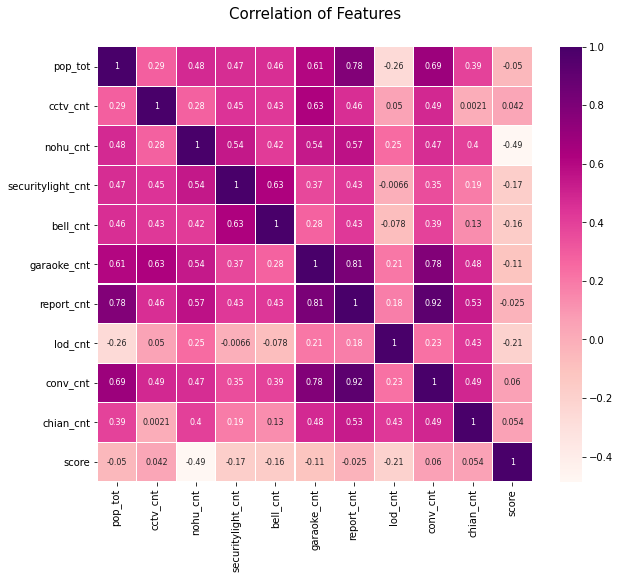

In [129]:
colormap = plt.cm.RdPu
plt.figure(figsize=(10, 8))
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(result.astype(float).corr(),
            linewidths = 0.1,
            vmax = 1.0,
            square = True,
            cmap = colormap,
            linecolor = "white",
            annot = True,
            annot_kws = {"size" : 8})

In [130]:
result_temp = result.drop(['score'], axis = 1)
scaler = MinMaxScaler()
result_x = scaler.fit_transform(result_temp)
result_x = pd.DataFrame(result_x, index = result_temp.index, columns = result_temp.columns)
result_x.head()

pop_tot  cctv_cnt  nohu_cnt  securitylight_cnt  bell_cnt  \
region                                                                
서울강동경찰서   0.728041  0.413623  0.454069           0.631176  0.000000   
서울송파경찰서   1.000000  0.323461  0.538455           0.505458  0.493251   
서울수서경찰서   0.540907  0.482866  0.198926           0.255029  0.426322   
서울방배경찰서   0.089964  0.415723  0.135688           0.271863  0.001125   
서울남대문경찰서  0.012946  0.110870  0.000000           0.095615  0.113048   

          garaoke_cnt  report_cnt   lod_cnt  conv_cnt  chian_cnt  
region                                                            
서울강동경찰서      0.671296    0.632212  0.346847  0.603015   0.555556  
서울송파경찰서      0.893519    1.000000  0.351351  0.819095   0.777778  
서울수서경찰서      0.263889    0.496858  0.000000  0.590452   0.222222  
서울방배경찰서      0.074074    0.028925  0.009009  0.042714   0.000000  
서울남대문경찰서     0.000000    0.000000  0.725225  0.040201   0.333333

In [131]:
result_y = result['score']
result_y.head()

region
서울강동경찰서     75.0
서울송파경찰서     75.3
서울수서경찰서     77.6
서울방배경찰서     79.6
서울남대문경찰서    74.4
Name: score, dtype: float64

In [132]:
X = result_x
y = result_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1000)

In [133]:
estimator = RandomForestRegressor()
kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )
param_grid = {
    'n_estimators': [100, 200, 250],
    'max_depth': [None, 6, 9],
    'min_samples_split': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt'],
}

grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] max_depth=None, max_features=auto, min_samples_split=0.01, n_estimators=100 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_split=0.01, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_split=0.01, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_split=0.01, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_split=0.01, n_estimators=100 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_split=0.01, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_split=0.01, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_split=0.01, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_split=0.01, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_split=0.01, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_split=0.01, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_split=0.01, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_split=0.01, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_split=0.01, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_split=0.01, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_split=0.01, n_estimators=100, total=   0.1s
[CV] max

[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.4min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=30, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 6, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 250]},
             verbose=2)

In [134]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 0.1,
 'n_estimators': 100}

In [135]:
reg = RandomForestRegressor(max_depth = grid_search.best_params_['max_depth'],
                           max_features = grid_search.best_params_['max_features'],
                           min_samples_split = grid_search.best_params_['min_samples_split'],
                           n_estimators = grid_search.best_params_['n_estimators'])

In [136]:
# reg = RandomForestRegressor(max_depth = 6,
#                            max_features = 'auto',
#                            min_samples_split = 0.01,
#                            n_estimators = 100)

In [137]:
reg.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=0.1)

In [138]:
pred = reg.predict(X_test)

In [139]:
errors = abs(pred - y_test)
# print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
mape = 100*(errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.5 %.


In [140]:
ft_series = pd.Series(reg.feature_importances_, index = result_x.columns.tolist())

In [141]:
ft_series.sort_values(ascending = False, inplace = True)

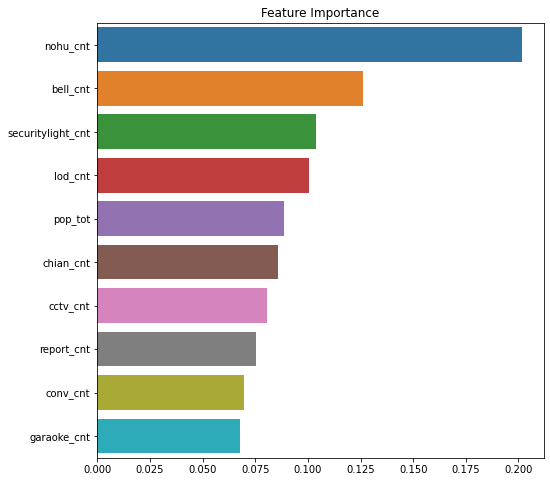

In [142]:
plt.figure(figsize=(8,8))
ax = sns.barplot(y = ft_series.index.tolist(), x = ft_series.values.tolist())
ax.set_title('Feature Importance')

plt.show()

In [143]:
result_police = result_x.join(result_y)
result_police.head()

pop_tot  cctv_cnt  nohu_cnt  securitylight_cnt  bell_cnt  \
region                                                                
서울강동경찰서   0.728041  0.413623  0.454069           0.631176  0.000000   
서울송파경찰서   1.000000  0.323461  0.538455           0.505458  0.493251   
서울수서경찰서   0.540907  0.482866  0.198926           0.255029  0.426322   
서울방배경찰서   0.089964  0.415723  0.135688           0.271863  0.001125   
서울남대문경찰서  0.012946  0.110870  0.000000           0.095615  0.113048   

          garaoke_cnt  report_cnt   lod_cnt  conv_cnt  chian_cnt  score  
region                                                                   
서울강동경찰서      0.671296    0.632212  0.346847  0.603015   0.555556   75.0  
서울송파경찰서      0.893519    1.000000  0.351351  0.819095   0.777778   75.3  
서울수서경찰서      0.263889    0.496858  0.000000  0.590452   0.222222   77.6  
서울방배경찰서      0.074074    0.028925  0.009009  0.042714   0.000000   79.6  
서울남대문경찰서     0.000000    0.000000  0.725225  0.040201   0.333333   74.4

In [144]:
result_police.to_csv('police_pred.csv')

수원시 격자 데이터에 모델 적용

In [145]:
suwon_grid = pd.read_csv('result_suwon.csv')
suwon_grid.set_index('region', inplace = True)

suwon_scale = scaler.fit_transform(suwon_grid)
suwon_grid_scale = pd.DataFrame(suwon_scale, index = suwon_grid.index, columns = suwon_grid.columns)

pred_suwon = reg.predict(suwon_grid_scale)

suwon_grid_scale_pred = suwon_grid_scale.copy()

suwon_grid_scale_pred['pred_score'] = pd.Series(pred_suwon, index = suwon_grid_scale.index.tolist(), name = 'pred_score')
suwon_grid_scale_pred[suwon_grid_scale_pred['nohu_cnt'] != 0].head()

pop_tot  cctv_cnt  nohu_cnt  securitylight_cnt  bell_cnt  \
region                                                                  
다사49ba19ba  0.009712      0.00  0.011278           0.000000       0.0   
다사49ba19bb  0.002525      0.04  0.011278           0.000000       0.0   
다사49ba20ab  0.000002      0.00  0.003759           0.000000       0.0   
다사49bb18bb  0.001315      0.00  0.015038           0.007463       0.0   
다사49bb19aa  0.002026      0.08  0.026316           0.029851       0.0   

            garaoke_cnt  report_cnt  lod_cnt  conv_cnt  chian_cnt  pred_score  
region                                                                         
다사49ba19ba          0.0    0.002435      0.0       0.0        0.0   73.229683  
다사49ba19bb          0.0    0.002656      0.0       0.0        0.0   72.717183  
다사49ba20ab          0.0    0.000000      0.0       0.0        0.0   72.717183  
다사49bb18bb          0.0    0.000221      0.0       0.0        0.0   72.717183  
다사49bb19aa          0.0    0.002877      0.0       0.0        0.0   72.717183

In [146]:
suwon_grid_scale_pred.to_csv('suwon_grid_pred.csv')

시각화

In [147]:
def multipolygon_to_coordinates(x):
    lon, lat = x[0].exterior.xy
    return [[x, y] for x, y in zip(lon, lat)]

In [148]:
df = pd.read_csv('result_suwon.csv')
layer = gpd.read_file('32.수원시_표준격자(250M_x_250M).geojson')
result = pd.merge(df, layer, how = 'left', left_on = 'region', right_on = 'gid')

In [149]:
score = pd.read_csv('suwon_grid_pred.csv')['pred_score']
result['score'] = score

In [150]:
result['coordinates'] = result['geometry'].apply(multipolygon_to_coordinates)
del result['geometry']
result.drop(['gid'], axis = 1, inplace = True)
result['score'] = (result['score'] - min(result['score'])) / (max(result['score'] - min(result['score'])))
result.head()

region   pop_tot  cctv_cnt  nohu_cnt  securitylight_cnt  bell_cnt  \
0  다사49aa19ab  3.742083       0.0       0.0                0.0       0.0   
1  다사49aa19ba  1.393333       0.0       0.0                0.0       0.0   
2  다사49aa20aa  0.005833       0.0       0.0                0.0       0.0   
3  다사49ab18ab  0.662500       0.0       0.0                0.0       0.0   
4  다사49ab18ba  2.418750       0.0       0.0                0.0       0.0   

   garaoke_cnt  report_cnt  lod_cnt  conv_cnt  chian_cnt     score  \
0          0.0         0.0      0.0       0.0        0.0  0.383439   
1          0.0         0.0      0.0       0.0        0.0  0.383439   
2          0.0         0.0      0.0       0.0        0.0  0.383439   
3          0.0         0.0      0.0       0.0        0.0  0.383439   
4          0.0         0.0      0.0       0.0        0.0  0.383439   

                                         coordinates  
0  [[126.92476861910082, 37.27076573094027], [126...  
1  [[126.92475147461319, 37.27301912088102], [126...  
2  [[126.92471717991359, 37.27752589816265], [126...  
3  [[126.92765647484667, 37.26176582525348], [126...  
4  [[126.92763942197818, 37.26401921976868], [126...

In [151]:
# Make layer
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    result, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color='[255, 255*score, 255*score]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True, # 마우스 오버(hover) 시 박스 출력
    extruded = True,
    get_elevation = 'nohu_cnt',
    elevation_scale = 12
)

# Set the viewport location
center = [127.00763942197818, 37.26401921976868]
view_state = pdk.ViewState(
    longitude=center[0],
    latitude=center[1],
    zoom=11.6)

view_state.bearing =15
view_state.pitch = 55

r = pdk.Deck(layers=[layer],
             mapbox_key = 'pk.eyJ1IjoiZm9ndXIwODI4IiwiYSI6ImNrdjBuc3ZxdzEydGQydnRjZGt2aDJxcDIifQ.m3d1-kcV8snlGvl5mFUbvg',
             initial_view_state=view_state)

r.to_html()

In [152]:
# Make layer
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    result, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color='[255, 255*score, 255*score]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True, # 마우스 오버(hover) 시 박스 출력
    extruded = True,
    get_elevation = 'bell_cnt',
    elevation_scale = 600
)

# Set the viewport location
center = [127.00763942197818, 37.26401921976868]
view_state = pdk.ViewState(
    longitude=center[0],
    latitude=center[1],
    zoom=11.6)

view_state.bearing =15
view_state.pitch = 55

r = pdk.Deck(layers=[layer],
             mapbox_key = 'pk.eyJ1IjoiZm9ndXIwODI4IiwiYSI6ImNrdjBuc3ZxdzEydGQydnRjZGt2aDJxcDIifQ.m3d1-kcV8snlGvl5mFUbvg',
             initial_view_state=view_state)

r.to_html()

In [153]:
# Make layer
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    result, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color='[255, 255*score, 255*score]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True, # 마우스 오버(hover) 시 박스 출력
    extruded = True,
    get_elevation = 'cctv_cnt',
    elevation_scale = 60
)

# Set the viewport location
center = [127.00763942197818, 37.26401921976868]
view_state = pdk.ViewState(
    longitude=center[0],
    latitude=center[1],
    zoom=11.6)

view_state.bearing =15
view_state.pitch = 55

r = pdk.Deck(layers=[layer],
             mapbox_key = 'pk.eyJ1IjoiZm9ndXIwODI4IiwiYSI6ImNrdjBuc3ZxdzEydGQydnRjZGt2aDJxcDIifQ.m3d1-kcV8snlGvl5mFUbvg',
             initial_view_state=view_state)

r.to_html()

In [154]:
# Make layer
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    result, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color='[255, 255*score, 255*score]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True, # 마우스 오버(hover) 시 박스 출력
)

# Set the viewport location
center = [127.00763942197818, 37.26401921976868]
view_state = pdk.ViewState(
    longitude=center[0],
    latitude=center[1],
    zoom=11.6)

# view_state.bearing =15
# view_state.pitch = 55

r = pdk.Deck(layers=[layer],
             mapbox_key = 'pk.eyJ1IjoiZm9ndXIwODI4IiwiYSI6ImNrdjBuc3ZxdzEydGQydnRjZGt2aDJxcDIifQ.m3d1-kcV8snlGvl5mFUbvg',
             initial_view_state=view_state)

r.to_html()

In [155]:
df = pd.read_csv('police_pred.csv')
layer = gpd.read_file('11.4개시도_경찰서_관할경계.geojson')
result = pd.merge(df, layer, how = 'left', left_on = 'region', right_on = 'NAME')

In [156]:
result['score'] = (result['score'] - min(result['score'])) / (max(result['score']) - min(result['score']))
result.drop(['NAME', 'PNAME'], axis = 1, inplace = True)

In [157]:
result['coordinates'] = result['geometry'].apply(multipolygon_to_coordinates)
del result['geometry']
result.head()

region   pop_tot  cctv_cnt  nohu_cnt  securitylight_cnt  bell_cnt  \
0   서울강동경찰서  0.728041  0.413623  0.454069           0.631176  0.000000   
1   서울송파경찰서  1.000000  0.323461  0.538455           0.505458  0.493251   
2   서울수서경찰서  0.540907  0.482866  0.198926           0.255029  0.426322   
3   서울방배경찰서  0.089964  0.415723  0.135688           0.271863  0.001125   
4  서울남대문경찰서  0.012946  0.110870  0.000000           0.095615  0.113048   

   garaoke_cnt  report_cnt   lod_cnt  conv_cnt  chian_cnt     score  \
0     0.671296    0.632212  0.346847  0.603015   0.555556  0.553846   
1     0.893519    1.000000  0.351351  0.819095   0.777778  0.576923   
2     0.263889    0.496858  0.000000  0.590452   0.222222  0.753846   
3     0.074074    0.028925  0.009009  0.042714   0.000000  0.907692   
4     0.000000    0.000000  0.725225  0.040201   0.333333  0.507692   

                                         coordinates  
0  [[127.11396613360706, 37.55684865871185], [127...  
1  [[127.14541702379694, 37.51605248206315], [127...  
2  [[127.12420435931921, 37.46652000218667], [127...  
3  [[127.00365191945393, 37.46770532996423], [127...  
4  [[126.97291392113931, 37.56934361154307], [126...

In [158]:
# Make layer
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    result, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color='[255, 255*score, 80]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True, # 마우스 오버(hover) 시 박스 출력
)

# Set the viewport location
center = [126.97291392113931, 37.56934361154307]
view_state = pdk.ViewState(
    longitude=center[0],
    latitude=center[1],
    zoom=9.5)

# view_state.bearing =15
# view_state.pitch = 55

r = pdk.Deck(layers=[layer],
             mapbox_key = 'pk.eyJ1IjoiZm9ndXIwODI4IiwiYSI6ImNrdjBuc3ZxdzEydGQydnRjZGt2aDJxcDIifQ.m3d1-kcV8snlGvl5mFUbvg',
             initial_view_state=view_state)

r.to_html()

기타 분석

In [159]:
df_apply = pd.read_csv('suwon_grid_pred.csv')

In [160]:
df_apply.drop(['pop_tot', 'cctv_cnt', 'securitylight_cnt',
       'bell_cnt', 'garaoke_cnt', 'report_cnt', 'lod_cnt', 'conv_cnt',
       'chian_cnt'], axis = 1, inplace = True)
df_apply.set_index('region', inplace = True)
df_apply['pred_score'] = (df_apply['pred_score'] - min(df_apply['pred_score'])) / (max(df_apply['pred_score'] - min(df_apply['pred_score'])))
df_apply.head()

nohu_cnt  pred_score
region                          
다사49aa19ab       0.0    0.383439
다사49aa19ba       0.0    0.383439
다사49aa20aa       0.0    0.383439
다사49ab18ab       0.0    0.383439
다사49ab18ba       0.0    0.383439

In [161]:
df_apply['nohu_lv'] = df_apply['nohu_cnt'].apply(lambda x: 4 if x >= 0.75 else 3 if x >= 0.5 else 2 if x >= 0.25 else 1)
df_apply['score_lv'] = df_apply['pred_score'].apply(lambda x: 1 if x >= 0.75 else 2 if x >= 0.5 else 3 if x >= 0.25 else 4)

In [162]:
df_apply['priority'] = df_apply['nohu_lv'] + df_apply['score_lv']

In [163]:
layer = gpd.read_file('32.수원시_표준격자(250M_x_250M).geojson')
apply = pd.merge(df_apply, layer, how = 'left', left_on = 'region', right_on = 'gid')
apply.head()

nohu_cnt  pred_score  nohu_lv  score_lv  priority         gid  \
0       0.0    0.383439        1         3         4  다사49aa19ab   
1       0.0    0.383439        1         3         4  다사49aa19ba   
2       0.0    0.383439        1         3         4  다사49aa20aa   
3       0.0    0.383439        1         3         4  다사49ab18ab   
4       0.0    0.383439        1         3         4  다사49ab18ba   

                                            geometry  
0  MULTIPOLYGON (((126.92477 37.27077, 126.92475 ...  
1  MULTIPOLYGON (((126.92475 37.27302, 126.92473 ...  
2  MULTIPOLYGON (((126.92472 37.27753, 126.92470 ...  
3  MULTIPOLYGON (((126.92766 37.26177, 126.92764 ...  
4  MULTIPOLYGON (((126.92764 37.26402, 126.92762 ...

In [164]:
apply['coordinates'] = apply['geometry'].apply(multipolygon_to_coordinates)
del apply['geometry']

In [165]:
apply.describe()

nohu_cnt   pred_score      nohu_lv     score_lv     priority
count  1982.000000  1982.000000  1982.000000  1982.000000  1982.000000
mean      0.090595     0.464810     1.213925     2.688194     3.902119
std       0.181992     0.127537     0.604249     0.563622     0.965589
min       0.000000     0.000000     1.000000     1.000000     2.000000
25%       0.000000     0.383439     1.000000     2.000000     3.000000
50%       0.003759     0.436621     1.000000     3.000000     4.000000
75%       0.067669     0.550587     1.000000     3.000000     4.000000
max       1.000000     1.000000     4.000000     4.000000     8.000000

In [166]:
apply['nor_pri'] = (apply['priority'] - 2) / 6

In [167]:
# Make layer
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    apply, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color='[255, 255*(1-nor_pri), 255*(1-nor_pri)]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True, # 마우스 오버(hover) 시 박스 출력
)

# Set the viewport location
center = [127.00763942197818, 37.29401921976868]
view_state = pdk.ViewState(
    longitude=center[0],
    latitude=center[1],
    zoom=10.7)

# view_state.bearing = 15
# view_state.pitch = 45

r = pdk.Deck(layers=[layer],
             mapbox_key = 'pk.eyJ1IjoiZm9ndXIwODI4IiwiYSI6ImNrdjBuc3ZxdzEydGQydnRjZGt2aDJxcDIifQ.m3d1-kcV8snlGvl5mFUbvg',
             initial_view_state=view_state)

r.to_html()

기대효과

In [168]:
df_effect = pd.read_csv('result_suwon.csv')
effect = pd.merge(df_effect, apply[['priority', 'gid']], how = 'left', left_on = 'region', right_on = 'gid')

In [169]:
effect = effect[effect['priority'] == 8]
effect.drop(['priority', 'gid'], axis = 1, inplace = True)
effect.set_index('region', inplace = True)

In [170]:
effect_scale = scaler.fit_transform(effect)

In [171]:
ori = pd.DataFrame(effect_scale, index = effect.index, columns = effect.columns)
ori.head()

pop_tot  cctv_cnt  nohu_cnt  securitylight_cnt  bell_cnt  \
region                                                                  
다사54aa19aa  0.559168      0.46  0.272727           0.492537       0.0   
다사55ba19ab  0.320567      0.00  1.000000           0.007463       0.0   
다사55ba19ba  0.333340      0.00  0.090909           0.000000       0.0   
다사56ba18bb  0.194163      0.16  0.469697           0.052239       0.0   
다사56bb17ba  0.257677      0.68  0.272727           0.514925       0.5   

            garaoke_cnt  report_cnt  lod_cnt  conv_cnt  chian_cnt  
region                                                             
다사54aa19aa          0.0    0.328452      0.0  0.333333        0.0  
다사55ba19ab          0.0    0.058577      0.0  0.000000        0.0  
다사55ba19ba          0.0    0.000000      0.0  0.000000        0.0  
다사56ba18bb          0.5    0.106695      0.0  0.000000        0.0  
다사56bb17ba          0.0    0.489540      0.0  0.333333        0.0

In [172]:
ori80 = ori.drop(['nohu_cnt'], axis = 1)
ori80['nohu_cnt'] = ori['nohu_cnt']*0.8

In [173]:
ori80 = ori80[['pop_tot', 'cctv_cnt', 'nohu_cnt', 'securitylight_cnt', 'bell_cnt',
       'garaoke_cnt', 'report_cnt', 'lod_cnt', 'conv_cnt', 'chian_cnt']]
ori80.head()

pop_tot  cctv_cnt  nohu_cnt  securitylight_cnt  bell_cnt  \
region                                                                  
다사54aa19aa  0.559168      0.46  0.218182           0.492537       0.0   
다사55ba19ab  0.320567      0.00  0.800000           0.007463       0.0   
다사55ba19ba  0.333340      0.00  0.072727           0.000000       0.0   
다사56ba18bb  0.194163      0.16  0.375758           0.052239       0.0   
다사56bb17ba  0.257677      0.68  0.218182           0.514925       0.5   

            garaoke_cnt  report_cnt  lod_cnt  conv_cnt  chian_cnt  
region                                                             
다사54aa19aa          0.0    0.328452      0.0  0.333333        0.0  
다사55ba19ab          0.0    0.058577      0.0  0.000000        0.0  
다사55ba19ba          0.0    0.000000      0.0  0.000000        0.0  
다사56ba18bb          0.5    0.106695      0.0  0.000000        0.0  
다사56bb17ba          0.0    0.489540      0.0  0.333333        0.0

In [174]:
ori = ori.to_numpy()
ori80 = ori80.to_numpy()

In [175]:
pred_effect = reg.predict(ori)
pred_effect80 = reg.predict(ori80)

In [176]:
pred_effect.mean()

73.23900317460321

In [177]:
pred_effect80.mean()

73.39418888888892